# Part 2: Training the model
In this model we're going to train a model without looking at any fairness metrics.
Remember, in part 1, we created a biased dataset, so this training procedure is going to produce an unfair model.

We'll cover the following topics in this notebook:

* [Loading and preprocessing the data](#loading-and-preprocessing-the-data)
* [Training the model](#training-the-model)
* [Validating the model](#validating-the-model)
* [Storing the model on disk](#storing-the-model-on-disk)

## Loading and preprocessing the data
First, we're going to load and preprocess the data for our model. We'll perform the following steps:

* First, we load the dataset and split it into a  training and validation set.
* Next, we collect the input variables for the model to train on.
* After that, we collect the output variable for the model to predict.

### Loading and splitting the dataset
We're loading the training set from `data/processed/train.csv` and set aside 30% of the data for validation purposes.
The rest we're using to train the model.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/processed/train.csv')
df_train, df_val = train_test_split(df, test_size=0.3)

### Extracting features for training
After we've loaded and split the dataset, we're going to extract the features from the dataset for training.
We already know that we shouldn't be using the `SEX` column, because it's a protected attribute. So we'll drop it. 

Also, note that we're dropping the `default.payment.next.month` column from the feature set as we don't want our predicted variable to be part of the input variables for the model.

In [3]:
x_train = df_train.drop(['SEX','default.payment.next.month'], axis=1)
x_val = df_val.drop(['SEX', 'default.payment.next.month'], axis=1)

### Extracting the output variable
Once we have the features for training, we're extracting the output variable that we want to predict.

In [4]:
y_train = df_train['default.payment.next.month']
y_val = df_val['default.payment.next.month']

## Training the model
Now that we have the data ready for training, let's train the model.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.ensemble import AdaBoostClassifier

model_1 = AdaBoostClassifier()
model_1.fit(x_train, y_train)

AdaBoostClassifier()

In [8]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.svm import SVC

model_3 = SVC()
model_3.fit(x_train, y_train)

SVC()

## Validating the model
After training, we're checking to make sure the performance of the model is what we expect it to be.
We're using two measures for performance: 

* Accuracy
* Receiver Operator Curve

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [11]:
model.score(x_val, y_val)

0.8375308641975309

In [12]:
model_1.score(x_val, y_val)

0.834320987654321

In [13]:
model_2.score(x_val, y_val)

0.7506172839506173

In [14]:
model_3.score(x_val, y_val)

0.774320987654321

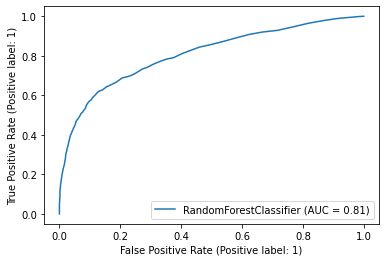

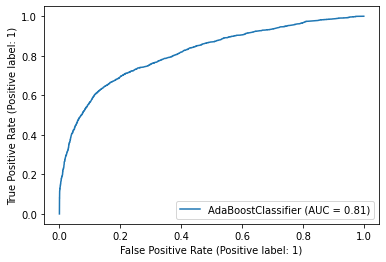

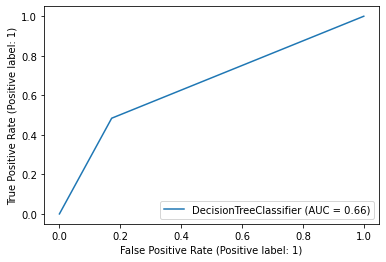

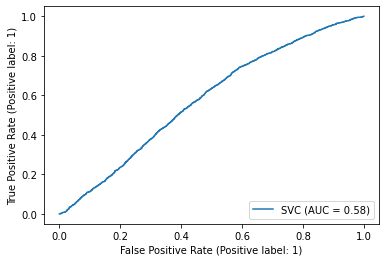

In [15]:
plot_roc_curve(model, x_val, y_val)
plot_roc_curve(model_1, x_val, y_val)
plot_roc_curve(model_2, x_val, y_val)
plot_roc_curve(model_3, x_val, y_val)

## Storing the model on disk
The final step in the notebook is to save the model to disk.

In [16]:
import joblib

In [19]:
joblib.dump(model, "../models/model.bin")

['../models/model.bin']

In [20]:
joblib.dump(model_1, "../models/model_1.bin")

['../models/model_1.bin']

In [21]:
joblib.dump(model_2, "../models/model_2.bin")

['../models/model_2.bin']

In [22]:
joblib.dump(model_3, "../models/model_3.bin")

['../models/model_3.bin']